# 18-Month Hackathon Scenario 5: Stock and flow testing and diagnostics model

A fundamental theory in molecular biology, known as the ‘the central dogma’, describes gene expression as the flow of information from DNA to RNA (through a step called transcription), and from RNA to proteins (through a step called translation). The processes of transcription, translation, and protein degradation, depend on the amount of RNA (specifically, mRNA), and proteins, and mathematically can be described as the rate of change of the concentrations of these materials. This scenario will explore several simple models of gene expression and regulation.

### Load Dependencies

In [2]:
import os
import pyciemss
import torch
import pandas as pd

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

In [24]:
start_time = 1e-5
end_time = 600.0
logging_step_size = 1.0
num_samples = 1

result = pyciemss.sample("scenario6_chen_petrinet.json", end_time, logging_step_size, num_samples, start_time=start_time, solver_method='dopri8')

ERROR:root:
                ###############################

                There was an exception in pyciemss

                Error occured in function: sample

                Function docs : 
    Load a model from a file, compile it into a probabilistic program, and sample from it.

    Args:
        model_path_or_json: Union[str, Dict]
            - A path to a AMR model file or JSON containing a model in AMR form.
        end_time: float
            - The end time of the sampled simulation.
        logging_step_size: float
            - The step size to use for logging the trajectory.
        num_samples: int
            - The number of samples to draw from the model.
        solver_method: str
            - The method to use for solving the ODE. See torchdiffeq's `odeint` method for more details.
            - If performance is incredibly slow, we suggest using `euler` to debug.
              If using `euler` results in faster simulation, the issue is likely that the model is s

AssertionError: non-finite values in state `y`: tensor([1.0895e+38, 1.0895e+38,        nan, 1.7006e+37, 1.7006e+37, 1.3605e+37])

/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/krue284/opt/anaconda3/envs/pyciemss/lib/python3.11/site-pa

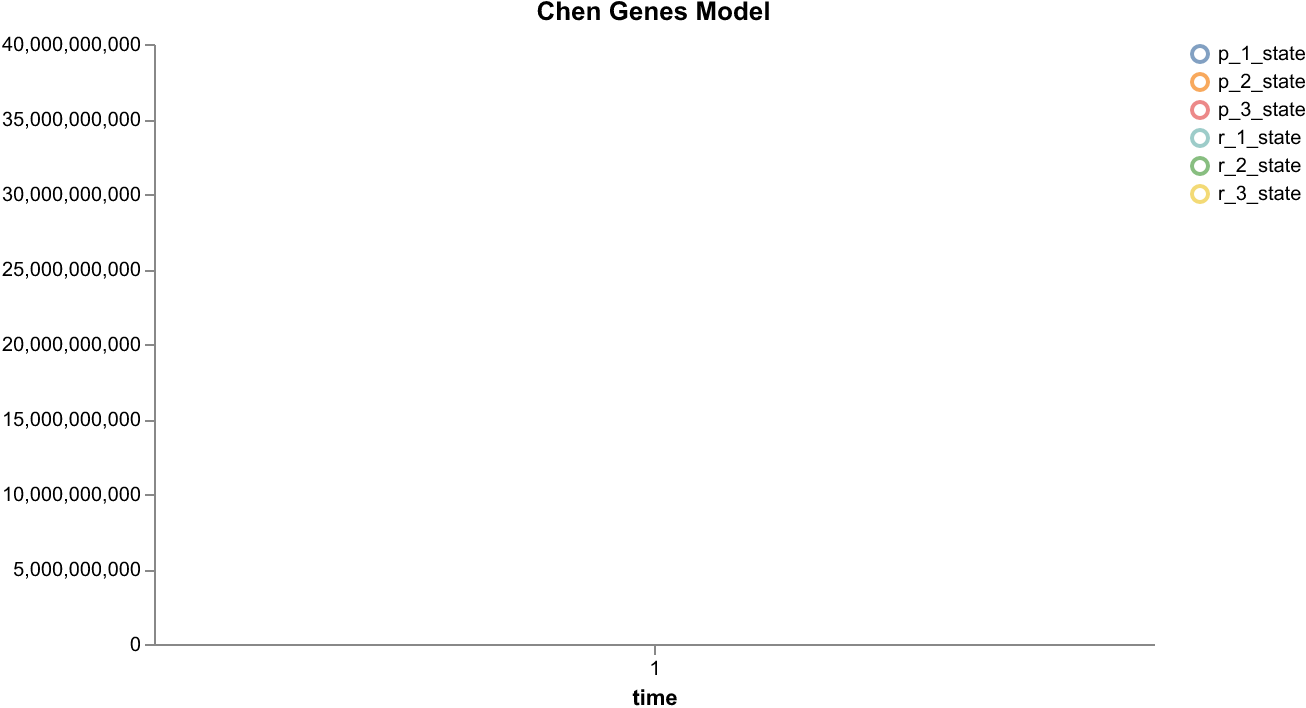

In [22]:
# Plot results
schema = plots.trajectories(result["data"], keep=".*_state")
schema = plots.set_title(schema, "Chen Genes Model")
schema = plots.set_title(schema, "time", target="x")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)